# Exploratory Data Analysis on Retail Sales Data

## Objective
The goal of this project is to perform an in-depth exploratory data analysis (EDA) on a retail sales dataset. This analysis will:
- Uncover trends, seasonal patterns, and anomalies in sales.
- Examine regional, category, and customer segment performance.
- Evaluate profitability, discount strategies, shipping efficiency, and more.
- Generate actionable insights and hypotheses for business decision-making.
- Demonstrate advanced data cleaning, transformation, and visualization techniques.

## Metadata
- **Project Name:** Exploratory Data Analysis on Retail Sales (Superstore Sales)
- **Dataset:** Superstore Sales Dataset (commonly available on Kaggle)
- **Tech Stack:** Python, Pandas, NumPy, Matplotlib, Seaborn, Plotly
- **Skills Demonstrated:**
  - Data cleaning and preprocessing
  - Time-series analysis
  - Advanced aggregations and pivoting
  - Multidimensional visualization and storytelling



# Dataset Overview

The Superstore Sales dataset contains sales records for a retail superstore and includes details such as:
- **Order Information:** Order ID, Order Date, Ship Date, Shipping Mode.
- **Customer Information:** Customer ID, Customer Segment.
- **Geographic Information:** Region, State, City.
- **Product Information:** Category, Sub-Category, Product Name.
- **Sales Metrics:** Sales, Quantity, Discount, Profit.
- **Additional Details:** Shipping cost, Order Priority, etc.

This dataset is ideal for multidimensional analysis as it covers time, geography, product lines, and customer segments.


# Step 1: Import Libraries and Load the Dataset

We begin by importing the required libraries and loading the dataset. Ensure that the CSV file (e.g., "superstore_sales.csv") is in your working directory or provide the correct path.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
%matplotlib inline

# Load the dataset (adjust the file path as necessary)
df = pd.read_csv("/content/Sample - Superstore.csv", encoding="ISO-8859-1")

# Display the first few rows of the dataset
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Explanation:**
- We import Pandas for data manipulation, NumPy for numerical operations, Matplotlib and Seaborn for static visualizations, and Plotly Express for interactive plots.
- `%matplotlib inline` ensures plots are rendered within the notebook.
- The dataset is loaded using `pd.read_csv()`. Adjust the path if needed.
- `df.head()` displays the first five rows so we can preview the data.


# Step 2: Data Overview and Cleaning

Before analysis, we inspect the dataset dimensions, check data types, search for missing values, and perform necessary transformations.


In [9]:
# Check the dataset dimensions
print("Dataset Shape:", df.shape)

# Display dataset info (data types, non-null counts)
df.info()

# Check for missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())

# Convert date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Display summary statistics for numerical and categorical columns
df.describe(include='all')


Dataset Shape: (9994, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-nu

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,NaN,NaN,4,793,793,3,1,531,49,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,5968,37,37,5191,9994,915,2001,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
min,1.000000,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,2015-05-23 00:00:00,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,2016-06-26 00:00:00,2016-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,2017-05-14 00:00:00,2017-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000
max,9994.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99301.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000


**Explanation:**
- We print the shape of the dataframe to know the number of records and columns.
- `df.info()` provides an overview of each column’s data type and the count of non-null values.
- Missing values are checked using `df.isnull().sum()`. Minimal or no missing values indicate data is clean.
- Date columns ("Order Date" and "Ship Date") are converted to datetime objects, which is essential for time-based analyses.
- `df.describe(include='all')` outputs summary statistics, helping us understand the distribution of numerical and categorical variables.


# Step 3: Exploratory Data Analysis (EDA)

In this section, we explore multiple dimensions of the data including time-series trends, regional performance, product categories, customer segments, and profitability. Each sub-section includes code for analysis and a markdown interpretation of the results.

---

## 3.1 Sales Trends Over Time

We start by aggregating sales data on a monthly basis to reveal seasonal patterns and overall trends.


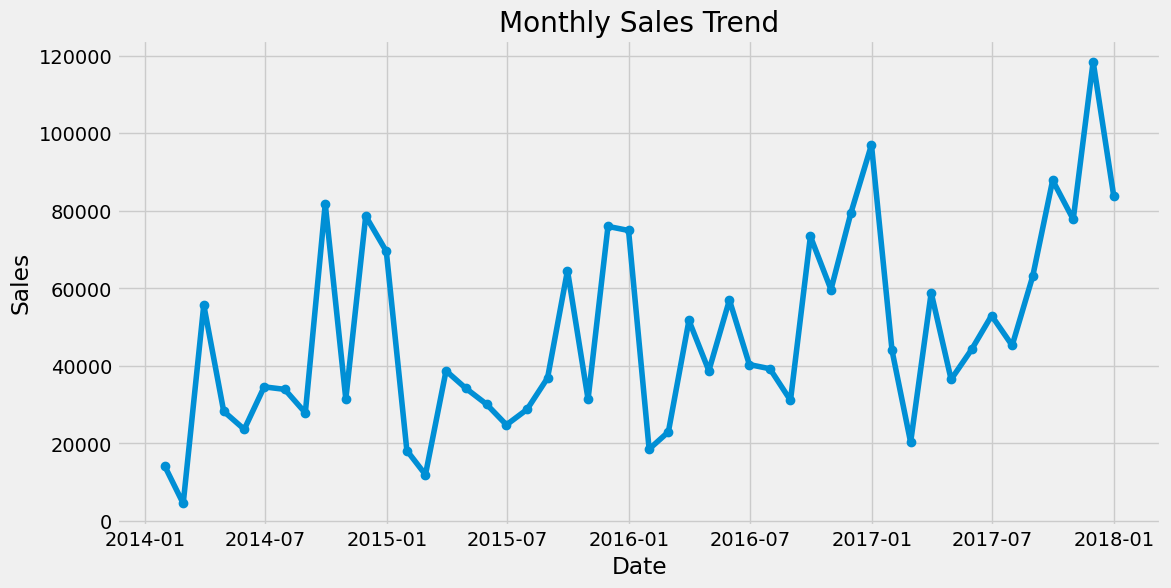

In [10]:
# Aggregate sales by month
monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


**Interpretation:**
- The plot shows clear seasonal fluctuations, with recurring peaks and troughs each year.
- There is an overall upward trend in sales over time, indicating growth.
- Specific high-performing months may correlate with promotional events or holiday seasons.


## 3.2 Regional Sales Performance

Analyzing sales by region helps identify geographic areas that contribute the most to revenue.


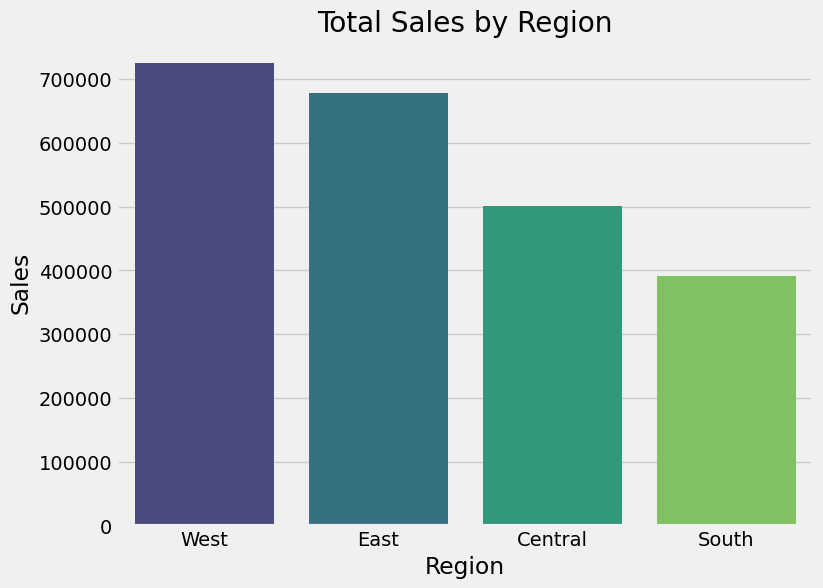

In [11]:
# Group total sales by region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Plot sales by region using a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()


**Interpretation:**
- The bar chart reveals that certain regions (e.g., "East", "West") have higher total sales.
- These regions may have larger customer bases, better market penetration, or more effective local strategies.
- Lower-performing regions could be the focus for targeted marketing efforts.


## 3.3 Product Category and Sub-Category Analysis

Understanding which product lines drive sales is critical for inventory and marketing strategies.


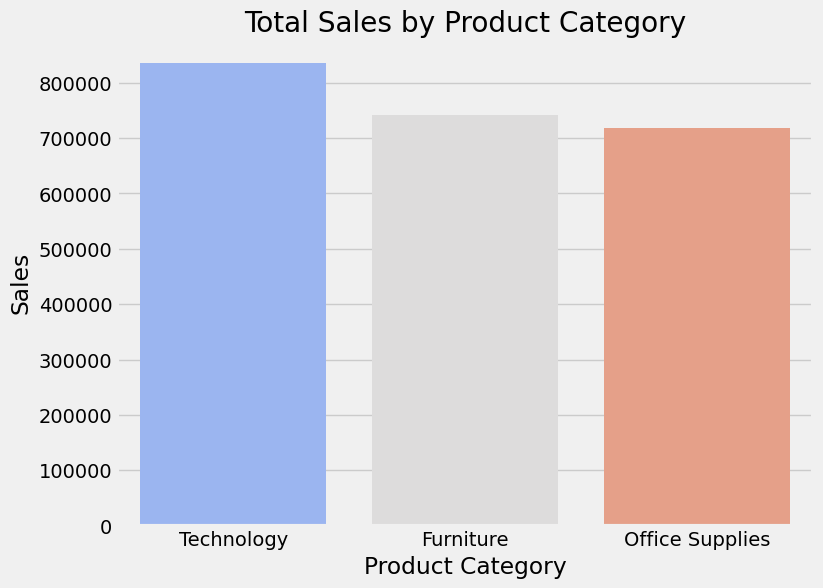

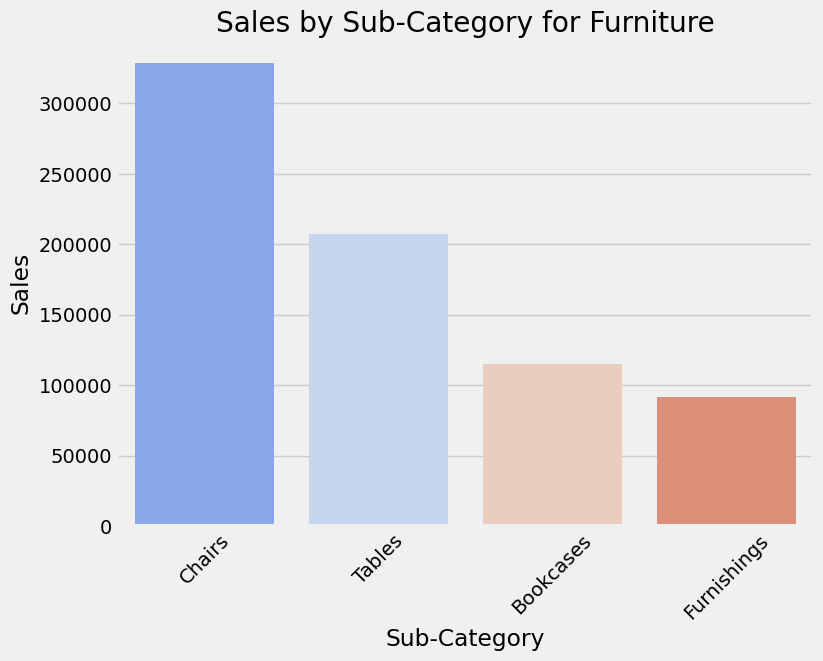

In [12]:
# Group sales by product category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Plot sales by product category
plt.figure(figsize=(8, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='coolwarm')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.show()

# For sub-category analysis within a category (e.g., Furniture)
furniture_sales = df[df['Category'] == 'Furniture'].groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=furniture_sales.index, y=furniture_sales.values, palette='coolwarm')
plt.title('Sales by Sub-Category for Furniture')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


**Interpretation:**
- The product category plot shows which main categories (e.g., Office Supplies, Furniture, Technology) are generating the highest sales.
- The sub-category analysis (here for Furniture) further refines this insight, showing which specific product types are the top sellers.
- Such insights guide inventory management and promotional strategies by focusing on high-performing segments.


## 3.4 Customer Segment Analysis

Examining sales by customer segment reveals differences in buying behavior among Consumer, Corporate, and Home Office segments.


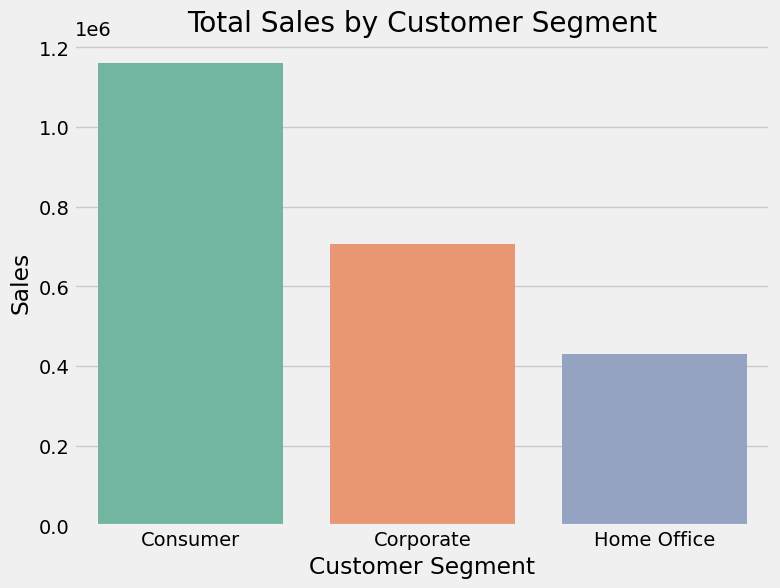

In [13]:
# Group total sales by customer segment
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

# Plot sales by customer segment
plt.figure(figsize=(8, 6))
sns.barplot(x=segment_sales.index, y=segment_sales.values, palette='Set2')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.show()


**Interpretation:**
- The chart indicates which customer segments contribute most to overall sales.
- For instance, if the "Consumer" segment dominates, marketing strategies might be tailored to appeal to individual buyers.
- Understanding segment contributions helps in personalizing outreach and improving customer retention.


## 3.5 Profitability Analysis

Profitability is key to business success. We examine profit margins by product category and overall to determine which areas yield higher profits.


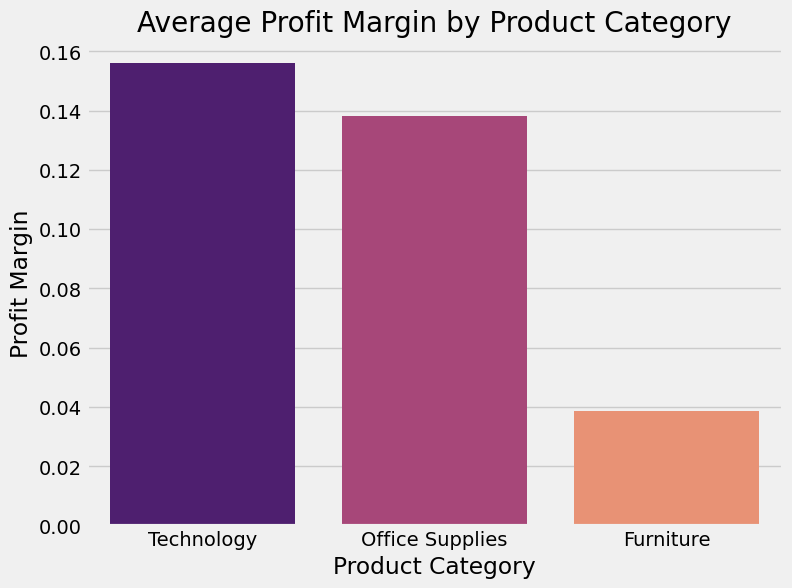

In [14]:
# Calculate profit margin for each order
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group by product category to get average profit margin
category_profit_margin = df.groupby('Category')['Profit Margin'].mean().sort_values(ascending=False)

# Plot average profit margin by product category
plt.figure(figsize=(8, 6))
sns.barplot(x=category_profit_margin.index, y=category_profit_margin.values, palette='magma')
plt.title('Average Profit Margin by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit Margin')
plt.show()


**Interpretation:**
- The profitability analysis shows that some categories may have lower sales but higher profit margins.
- This insight is crucial for strategic decisions: a category with high profit margins might deserve more focus even if its sales volume is lower.
- Balancing high-volume, low-margin categories with lower-volume, high-margin ones is key to overall profitability.


## 3.6 Shipping Efficiency Analysis

We explore the efficiency of the shipping process by calculating the shipping time (in days) from order to ship date.


Shipping Time Statistics:
 count    9994.000000
mean        3.958175
std         1.747567
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Shipping Time, dtype: float64


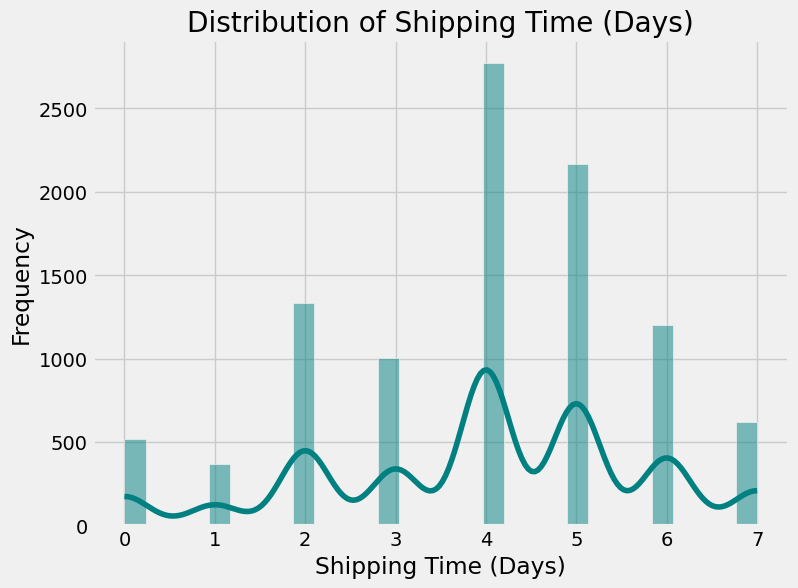

In [15]:
# Calculate shipping time in days
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Summary statistics of shipping time
shipping_time_stats = df['Shipping Time'].describe()
print("Shipping Time Statistics:\n", shipping_time_stats)

# Plot the distribution of shipping time
plt.figure(figsize=(8, 6))
sns.histplot(df['Shipping Time'], bins=30, kde=True, color='teal')
plt.title('Distribution of Shipping Time (Days)')
plt.xlabel('Shipping Time (Days)')
plt.ylabel('Frequency')
plt.show()


**Interpretation:**
- The summary statistics reveal the central tendency and variability of shipping times.
- The histogram shows that most orders are shipped within a consistent timeframe; however, there are outliers that take significantly longer.
- These outliers could indicate logistical issues that might need further investigation.


## 3.7 Discount Impact Analysis

Understanding the effect of discounts on sales and profit margins is vital for designing effective pricing strategies.


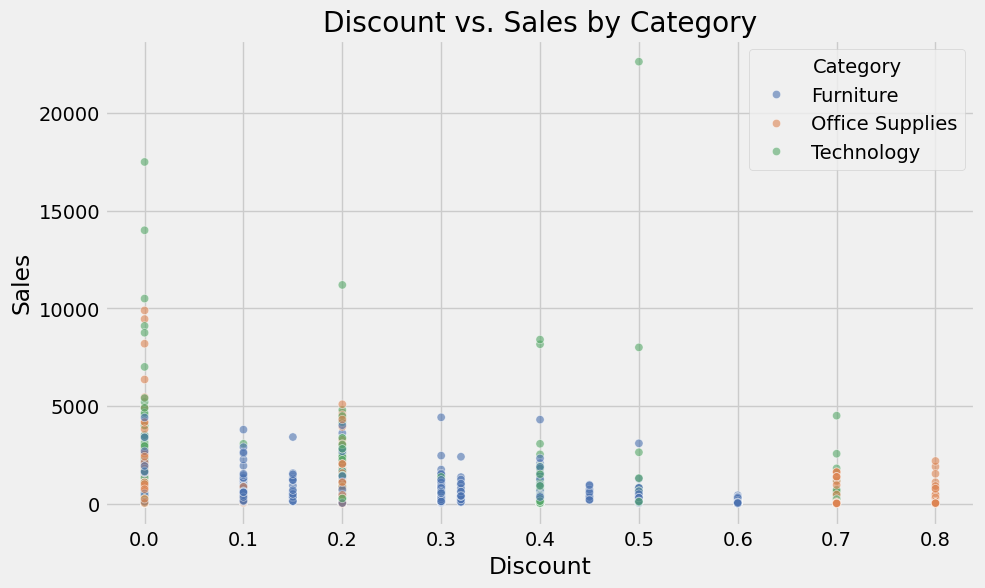

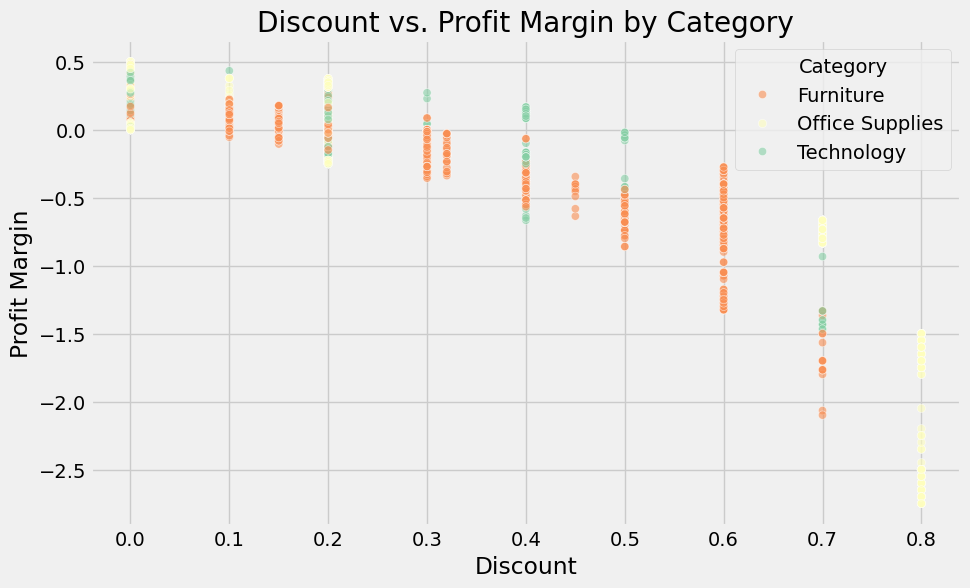

In [16]:
# Scatter plot: Discount vs. Sales by Category
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Sales', data=df, hue='Category', palette='deep', alpha=0.6)
plt.title('Discount vs. Sales by Category')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.legend(title='Category')
plt.show()

# Scatter plot: Discount vs. Profit Margin by Category
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit Margin', data=df, hue='Category', palette='Spectral', alpha=0.6)
plt.title('Discount vs. Profit Margin by Category')
plt.xlabel('Discount')
plt.ylabel('Profit Margin')
plt.legend(title='Category')
plt.show()


**Interpretation:**
- The first scatter plot illustrates that increased discounts often correspond to higher sales volumes across many categories.
- However, the second scatter plot shows that higher discounts can lead to lower profit margins.
- These visualizations underscore the need for an optimal discount strategy that drives volume without sacrificing profitability.


## 3.8 Interactive Time Series Visualization

For dynamic exploration of sales trends, an interactive Plotly chart allows users to zoom in and examine details.


In [17]:
# Interactive time series plot using Plotly Express
fig = px.line(monthly_sales.reset_index(), x='Order Date', y='Sales', title='Interactive Monthly Sales Trend')
fig.show()


**Interpretation:**
- This interactive chart allows stakeholders to explore sales trends by hovering over specific months, zooming in on periods of interest, and capturing fine-grained insights.
- The interactivity enhances understanding and facilitates deeper discussions on seasonal patterns and anomalies.


# Step 4: Advanced Analysis and Hypothesis Generation

Based on our detailed EDA, we now generate hypotheses that can be further investigated or used to drive business strategy.


### Hypothesis Generation:
1. **Seasonal Promotions:**  
   Certain months (e.g., November and December) consistently show higher sales. A targeted promotional campaign during these periods could further boost revenue.
   
2. **Regional Focus:**  
   Regions with lower sales might be under-served. Focused marketing efforts or localized store improvements may improve performance in these areas.
   
3. **Product Mix Optimization:**  
   Categories with high profit margins but lower sales volumes may benefit from increased promotional support or strategic inventory adjustments.
   
4. **Discount Strategy:**  
   Given the inverse relationship between discounts and profit margins, there exists an optimal discount threshold that maximizes sales without severely impacting profitability. Further analysis (e.g., regression models) could quantify this threshold.
   
5. **Shipping Improvements:**  
   The presence of outlier shipping times indicates potential operational issues. Analyzing these cases in detail could help streamline logistics and improve customer satisfaction.


# Step 5: Conclusion

In this ultimate guide to EDA on the Superstore Sales retail dataset, we:
- **Loaded and cleaned the dataset:** Ensuring the data was ready for analysis by checking dimensions, data types, and missing values.
- **Explored multiple dimensions:** Analyzed sales trends over time, regional performance, product categories, customer segments, profitability, shipping efficiency, and discount impacts.
- **Visualized insights:** Used static and interactive visualizations (Matplotlib, Seaborn, Plotly) to highlight key trends and anomalies.
- **Generated actionable hypotheses:** Based on our findings, we proposed strategies for seasonal promotions, regional marketing, product mix optimization, discount strategies, and shipping improvements.

This comprehensive analysis not only deepens our understanding of retail sales dynamics but also sets the stage for predictive modeling and further business strategy development. Future work could include advanced forecasting, customer segmentation, or A/B testing of marketing strategies based on these insights.
